In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

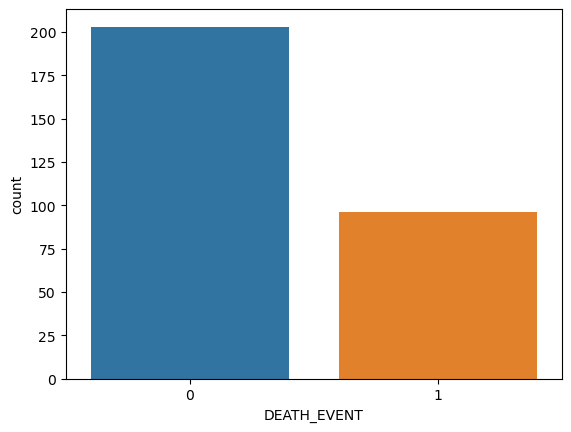

In [6]:
sns.countplot(x='DEATH_EVENT',data=df)

In [7]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

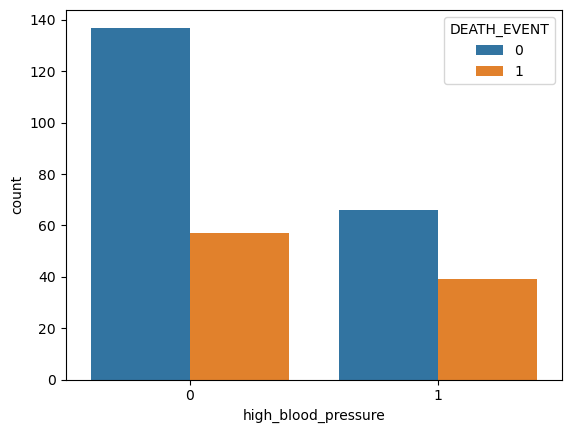

In [8]:
sns.countplot(x='high_blood_pressure', data=df, hue='DEATH_EVENT')

In [9]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

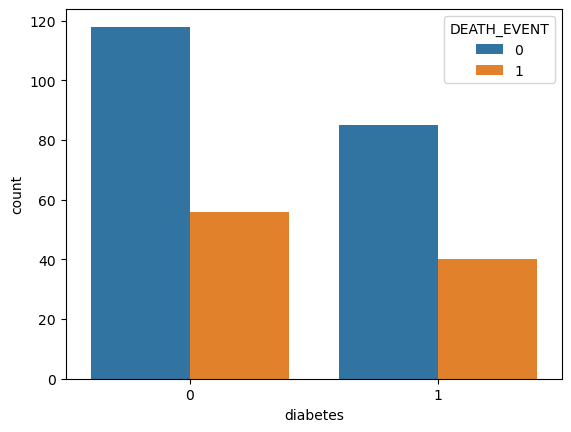

In [10]:
sns.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

In [11]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<Axes: xlabel='anaemia', ylabel='count'>

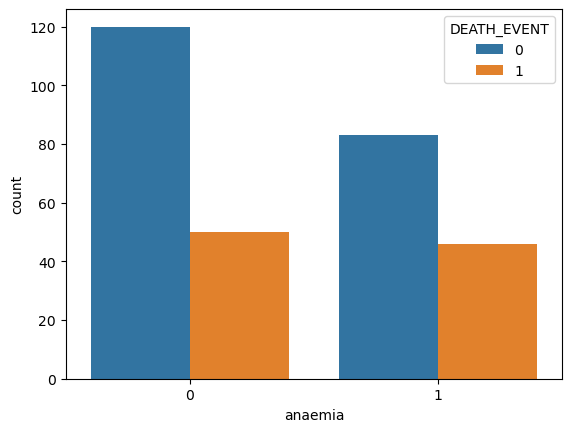

In [12]:
sns.countplot(x='anaemia', data=df, hue="DEATH_EVENT")

In [13]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

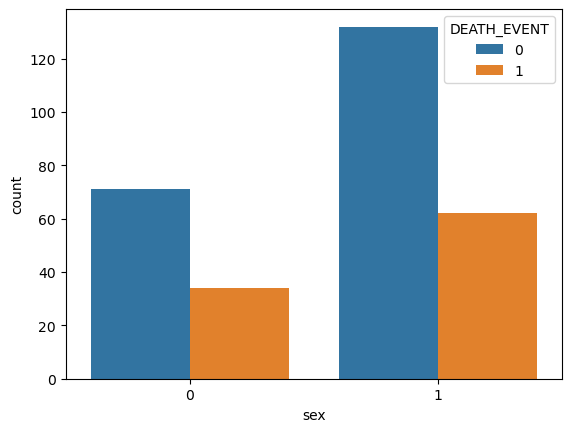

In [14]:
sns.countplot(x='sex',data=df, hue='DEATH_EVENT')

In [15]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

<Axes: xlabel='smoking', ylabel='count'>

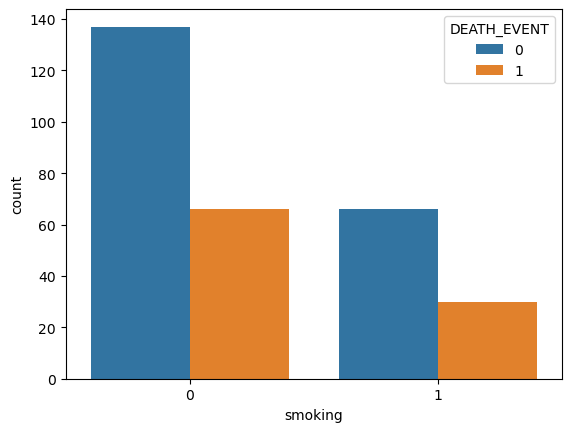

In [16]:
sns.countplot(x='smoking',data=df, hue='DEATH_EVENT')

In [17]:
x = df.drop('DEATH_EVENT', axis=1)
y = df[['DEATH_EVENT']]

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, random_state=42)


In [19]:
xtrain.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [21]:
dt.fit(x,y)

DecisionTreeClassifier()

In [22]:
y_pred_train = dt.predict(xtrain)

In [23]:
y_pred_train

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
ytrain.head(3)

,DEATH_EVENT
224,0
68,1
222,0


In [25]:
ytrain['predicted_event'] = y_pred_train
ytrain.head(10)

,DEATH_EVENT,predicted_event
224,0,0
68,1,1
222,0,0
37,1,1
16,1,1
119,1,1
268,0,0
269,0,0
67,1,1
101,0,0


In [26]:
dt.score(xtrain,ytrain['DEATH_EVENT'])

1.0

Testing Result

In [27]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74


In [28]:
y_pred_test = dt.predict(xtest)

In [29]:
y_pred_test

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Confusion Matrix¶

In [31]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [32]:
ytest.head()

,DEATH_EVENT
281,0
265,0
164,1
9,1
77,0
